In [1]:
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math

# 1. Выделить наиболее протяженный участок при помощи преобразования Хафа

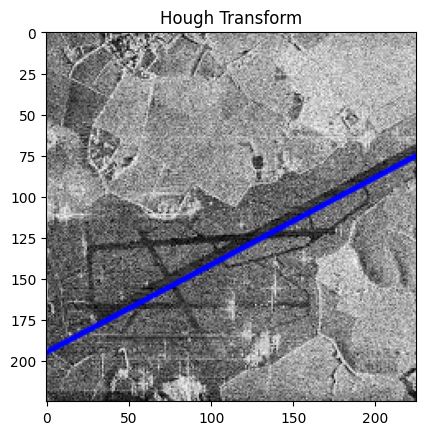

In [2]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(image_gray,(9,9),0)

canny = cv2.Canny(blur, 150, 250, apertureSize=5)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 140)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * a))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * a))
        cv2.line(image, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

plt.imshow(image, cmap='gray')
plt.title('Hough Transform')
plt.show()

# 2. Алгоритмы бинаризации

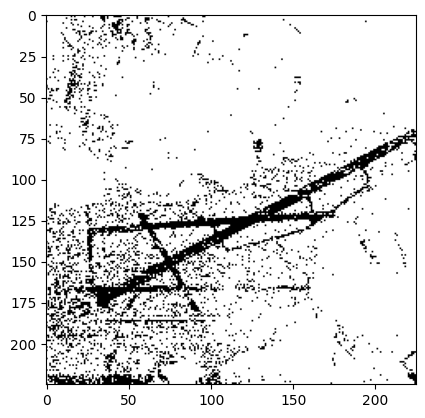

алгоритм с лучшим результатом из использованных


In [3]:

bin_img = copy.deepcopy(image_gray)
T  = 70
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255
plt.imshow(bin_img, cmap='gray')
plt.show()
print("алгоритм с лучшим результатом из использованных")

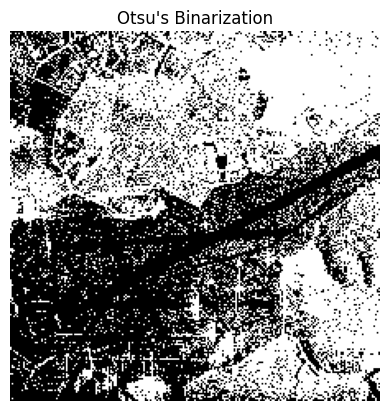

In [4]:
_, th2 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.title("Otsu's Binarization")
plt.axis('off')
plt.imshow(th2, cmap='gray')

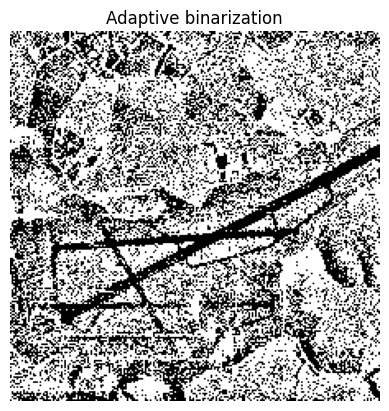

In [5]:
th3 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 71, 11)
plt.imshow(th3, cmap='gray')
plt.title('Adaptive binarization')
plt.axis('off')
plt.show()

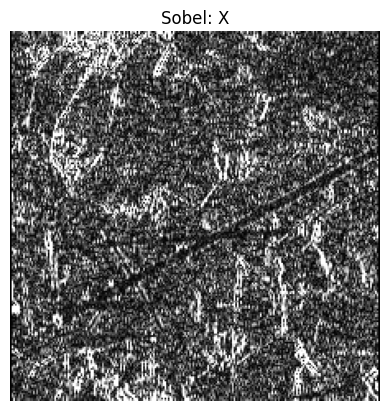

In [6]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# plt.imshow((grad_x - grad_x.min())*255, cmap='gray')
plt.imshow(abs_grad_x, cmap='gray')
plt.title('Sobel: X')
plt.axis('off')
plt.show()

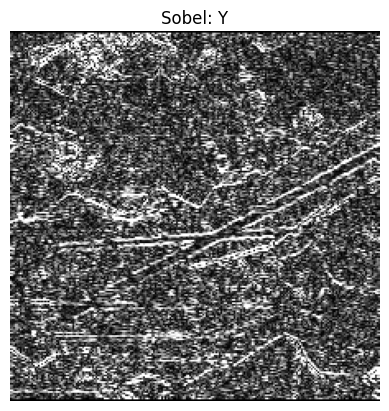

In [7]:
# plt.imshow((grad_y - grad_y.min())*255, cmap='gray')
plt.imshow(abs_grad_y, cmap='gray')
plt.title('Sobel: Y')
plt.axis('off')
plt.show()

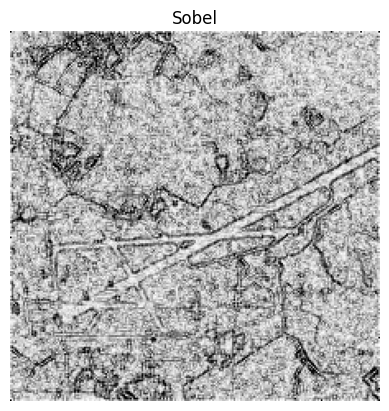

In [8]:
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.title('Sobel')
plt.axis('off')
plt.imshow((grad - grad.min()) * 255, cmap='gray')